In [17]:
!pip install pyspark

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, count, col
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, date_format
import pandas as pd
import numpy as np
from scipy import stats

In [19]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.format("csv").option("header", True).load("/content/Health.csv")
print(df.dtypes)
df.printSchema()
df.show()

[('Credential ID', 'string'), ('Name', 'string'), ('Type', 'string'), ('Business Name', 'string'), ('DBA', 'string'), ('Full Credential Code', 'string'), ('Credential', 'string'), ('Status', 'string'), ('Issue Date', 'string'), ('Effective Date', 'string'), ('Expiration Date', 'string'), ('Address', 'string'), ('City', 'string'), ('Zip Code', 'string'), ('Location', 'string'), ('Healthcare ID', 'string')]
root
 |-- Credential ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Business Name: string (nullable = true)
 |-- DBA: string (nullable = true)
 |-- Full Credential Code: string (nullable = true)
 |-- Credential: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Effective Date: string (nullable = true)
 |-- Expiration Date: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zip Code: string (nullable = true)
 |-- Lo

In [20]:
from pyspark.sql.functions import to_date

# Convert all date columns to a consistent date format
date_format = 'MM/dd/yyyy'

df = df.withColumn('Issue Date', to_date(df['Issue Date'], date_format))
df = df.withColumn('Effective Date', to_date(df['Effective Date'], date_format))
df = df.withColumn('Expiration Date', to_date(df['Expiration Date'], date_format))

# Show the DataFrame with the converted date columns
df.select('Issue Date', 'Effective Date', 'Expiration Date').show()

+----------+--------------+---------------+
|Issue Date|Effective Date|Expiration Date|
+----------+--------------+---------------+
|2011-06-22|    2023-01-04|     2025-03-31|
|2010-01-04|    2022-01-04|     2024-03-31|
|2017-06-30|    2023-01-04|     2025-03-31|
|2006-12-14|    2023-01-04|     2025-03-31|
|1999-12-31|    2022-01-04|     2024-03-31|
|2009-01-10|    2023-01-10|     2025-09-30|
|2008-01-04|    2022-01-04|     2024-03-31|
|2022-01-09|    2022-01-09|     2024-06-30|
|2004-06-22|    2022-01-07|     2024-06-30|
|2019-10-24|    2023-01-10|     2025-09-30|
|2015-09-12|    2023-01-10|     2025-09-30|
|2020-06-03|    2022-01-04|     2024-06-30|
|2008-01-01|    2022-01-01|     2023-12-31|
|2019-01-14|    2022-01-10|     2024-09-30|
|2009-01-07|    2021-01-07|     2023-06-30|
|2010-01-01|    2022-01-01|     2023-12-31|
|2014-12-18|    2022-01-10|     2024-09-30|
|2018-11-10|    2022-01-10|     2024-09-30|
|2006-05-22|    2022-01-07|     2024-06-30|
|2016-06-20|    2022-01-04|     

In [21]:
# Extract year from the dates
df = df.withColumn('Issue Year', year(df['Issue Date']))
df = df.withColumn('Effective Year', year(df['Effective Date']))
df = df.withColumn('Expiration Year', year(df['Expiration Date']))

# Show the DataFrame with the extracted year columns
df.select('Issue Date', 'Issue Year', 'Effective Date', 'Effective Year', 'Expiration Date', 'Expiration Year').show()

+----------+----------+--------------+--------------+---------------+---------------+
|Issue Date|Issue Year|Effective Date|Effective Year|Expiration Date|Expiration Year|
+----------+----------+--------------+--------------+---------------+---------------+
|2011-06-22|      2011|    2023-01-04|          2023|     2025-03-31|           2025|
|2010-01-04|      2010|    2022-01-04|          2022|     2024-03-31|           2024|
|2017-06-30|      2017|    2023-01-04|          2023|     2025-03-31|           2025|
|2006-12-14|      2006|    2023-01-04|          2023|     2025-03-31|           2025|
|1999-12-31|      1999|    2022-01-04|          2022|     2024-03-31|           2024|
|2009-01-10|      2009|    2023-01-10|          2023|     2025-09-30|           2025|
|2008-01-04|      2008|    2022-01-04|          2022|     2024-03-31|           2024|
|2022-01-09|      2022|    2022-01-09|          2022|     2024-06-30|           2024|
|2004-06-22|      2004|    2022-01-07|          2022| 

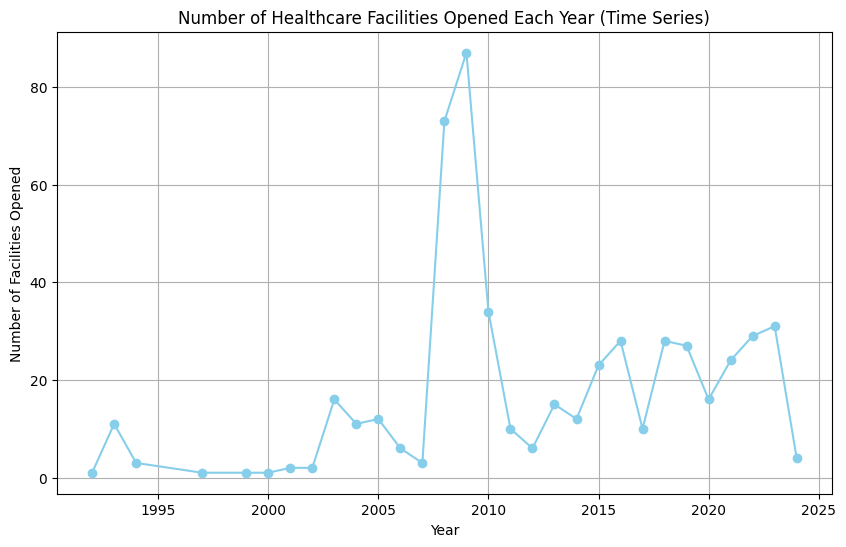

In [25]:
import matplotlib.pyplot as plt

# Group by "Issue Year" and count the number of records for each year
facilities_opened_per_year = df.groupBy('Issue Year').count().orderBy('Issue Year')

# Convert PySpark DataFrame to Pandas DataFrame
facilities_opened_per_year_pd = facilities_opened_per_year.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(facilities_opened_per_year_pd["Issue Year"], facilities_opened_per_year_pd["count"], marker='o', color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Facilities Opened")
plt.title("Number of Healthcare Facilities Opened Each Year (Time Series)")
plt.grid(True)
plt.show()


In [26]:
# Filter the DataFrame for the first time period (2006 to 2012)
first_period_df = df.filter((df['Issue Year'] >= 2006) & (df['Issue Year'] <= 2012))

# Filter the DataFrame for the second time period (2013 to 2018)
second_period_df = df.filter((df['Issue Year'] >= 2013) & (df['Issue Year'] <= 2018))